Create plot for full ensemble of SLR projections for 3 SSPs

Ensemble contains a range of ESMs and ISMs

Computation is done with and without feedback

In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import utils as ut

%load_ext autoreload
%autoreload 2

In [2]:
ds = xr.open_dataset('../data/dummy.nc')
ds = ds.isel(exp=slice(0,5))

In [3]:
mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.left'] = .1
mpl.rcParams['figure.subplot.right'] = .99
mpl.rcParams['figure.figsize'] = (7,3)

126 ACCESS-CM2 CISM_NCA 0.1086287401624066 0.12758200325221944
126 ACCESS-CM2 GRIS_LSC 0.08982189271288757 0.10915882581224405
126 ACCESS-CM2 IMAU_VUB 0.08046831703261074 0.09491196420253116
126 ACCESS-CM2 ISSM_UCI 0.08929482628215148 0.10730918527019499
126 ACCESS-CM2 PISM_DMI 0.08826643063038217 0.10694966034522545
126 ACCESS-CM2 PISM_PIK 0.0976940560905294 0.11677227061587674
126 CAMS-CSM1-0 CISM_NCA 0.11754744900415415 0.13805682546549614
126 CAMS-CSM1-0 GRIS_LSC 0.0971965092970737 0.11812105609744222
126 CAMS-CSM1-0 IMAU_VUB 0.08707498014521176 0.10270448921069374
126 CAMS-CSM1-0 ISSM_UCI 0.09662616930881532 0.11611955514136502
126 CAMS-CSM1-0 PISM_DMI 0.09551333963545525 0.11573051226265352
126 CAMS-CSM1-0 PISM_PIK 0.10571499825130688 0.12635958499378186
126 CAS-ESM2-0 CISM_NCA 0.10033236313620161 0.11783809570844747
126 CAS-ESM2-0 GRIS_LSC 0.08296186390247025 0.10082196419236106
126 CAS-ESM2-0 IMAU_VUB 0.07432265525131204 0.08766318788288852
126 CAS-ESM2-0 ISSM_UCI 0.08247505147

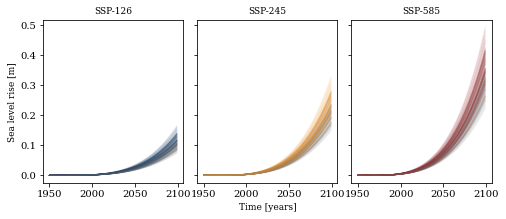

In [4]:
fig,ax = plt.subplots(1,3,sharex=True,sharey=True)

for s,ss in enumerate(ds.ssp.values):
    dax = ax[s]
    for e,es in enumerate(ds.esm.values):
        for i,ii in enumerate(ds.ism.values):
            TMP,IML,SLR = ut.iterate(ds,ism=ii,esm=es,ssp=ss,niter=2)
            dax.plot(ds.time,np.sum(SLR[0,:,:],axis=1),c='.5',lw=1,alpha=.1)
            dax.plot(ds.time,np.sum(SLR[-1,:,:],axis=1),c=ut.scol[ss],lw=1,alpha=.1)
            print(ss,es,ii,np.sum(SLR[0,-1,:]),np.sum(SLR[-1,-1,:]))
    dax.set_title(f'SSP-{ss}')

ax[0].set_ylabel('Sea level rise [m]')
ax[1].set_xlabel('Time [years]')

plt.savefig(f'../draftfigs/full_ensemble.png',dpi=450)
plt.show()